# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0383 Емельянов Дмитрий и Черепанов Роман. Вариант №16.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения
Пусть $\{x_k\}$ — последовательность дискретных отсчетов с периодом $N: \forall k x_k = x_{k+N}$.

Рассмотрим последовательность $\{x_0, \dots, x_{N-1}\}$.

Спектр $s(t)$ должен быть периодическим. Найдем его коэффициенты:
$$X(n) = \frac{1}{NT}\int_0^{NT}s(t)e^{-i\omega_n t}dt.$$
Дискретный аналог формулы без множителя — **дискретное преобразование Фурье**:
$$X(n) = \sum_0^{N-1}x_ke^{-i\frac{2\pi n}{N}k}dt.$$

Пусть $\{x_k\}, \{y_k\}$ — дискретные последовательности, $\{X(n)\}, \{Y(n)\}$ — соответствующие ДПФ. Тогда ДПФ обладает следующими свойствами:
* **Линейность**: ДПФ$[\alpha\{x_k\} + \beta\{y_k\}] = \alpha \{X(n)\} + \beta \{Y(n)\}$;
* **Задержка**: $\{y(k)\} = \{x(k-1)\} \implies \{Y(n)\} = \{X(n)\exp\frac{-2i\pi n}{N}\}$;
* **Симметрия**: $X(N - n) = X(-n) = X^*(n)$ — имеет место для вещественного сигнала;

Для сглаживания сигнала прямой линией $y(t) = A + Bt$ по $2m + 1$ точкам решается система:

$F(A, B) = \sum_{k=-m}^{m} (s_k - y_k)^2=\sum_{k=-m}^{m} (s_k - A - Bk)^2 \rightarrow min$

Дифференцируем выражение по $A$ и $B$ и приравниваем результаты к 0:

\begin{cases}
    \sum_{k=-m}^{m} 2(s_k - A - Bk) = 0, \\
    \sum_{k=-m}^{m} 2k(s_k - A - Bk) = 0.
\end{cases}

Преобразуем выражение:
\begin{cases}
   \sum_{k=-m}^{m}[s_k] - (2m+1)A = 0, \\
   \sum_{k=-m}^{m}[ks_k] - B\sum_{k=-m}^{m}k^2 = 0.
\end{cases}

Отсюда:
\begin{cases}
   A = \frac{\sum_{k=-m}^{m}s_k}{2m+1}, \\
   B = \frac{\sum_{k=-m}^{m}ks_k}{\sum_{k=-m}^{m}k^2}.
\end{cases}

Пусть $s_n=e^{i\omega n}$, тогда: $$y_n=\frac{e^{-i\omega m} + \dots + e^{i\omega m}}{2m + 1} e^{i\omega n}=H(\omega)e^{i\omega n}.$$

Но $e^{-i\omega n} + e^{i\omega n} = 2\cos(\omega n)$, поэтому:

$$\frac{1 + 2\cos(\omega) + \dots + 2\cos(m\omega)}{2m + 1}=H(\omega).$$

Для сглаживания сигнала полнимомом второго порядка $y(t)=A + Bt + Ct^2$ применяется следующее выражение:
$F(A, B, C) = \sum_{k=-m}^{m} (s_k - y_k)^2=\sum_{k=-m}^{m} (s_k - A - Bk - Ck^2)^2 \rightarrow min$

По аналогии, дифференцируем выражение по каждой из переменных:
\begin{cases}
    \sum_{k=-m}^{m} 2(s_k - A - Bk-Ck^2) = 0, \\
    \sum_{k=-m}^{m} 2k(s_k - A - Bk-Ck^2) = 0, \\
    \sum_{k=-m}^{m} 2k^2(s_k - A - Bk-Ck^2) = 0.
\end{cases}

Преобразуем выражение:
\begin{cases}
   \sum_{k=-m}^{m}[s_k] - A(2m+1)- C\frac{m(m+1)(2m+1)}{3} = 0, \\
   \sum_{k=-m}^{m}[ks_k] - B\sum_{k=-m}^{m}k^2 = 0, \\
   \sum_{k=-m}^{m}[k^2s_k] - A\frac{m(m+1)(2m+1)}{3} - C\frac{m(m+1)(2m+1)(3m^2+3m-1)}{15} = 0.
 \end{cases}

После решения системы получаем:
$$A = \frac{15(\frac{3m^2+3m-1}{5}\sum_{k=-m}^{m}[s_k] - \sum_{k=-m}^{m}k^2s_k)}{(2m-1)(2m+1)(2m+3)}.$$

Таким образом: $$y_n = \frac{15\cdot (\frac{3m^2+3m-1}{5}\sum_{k=n-m}^{n+m}[s_k] - \sum_{k=n-m}^{n+m}k^2s_k)}{(2m-1)(2m+1)(2m+3)}=\frac{15\cdot(\frac{3m^2+3m-1}{5}(s_{n-m}+\dots+s_{n+m})-(s_{n-1}+s_{n+1})-\dots-m^2(s_{n-m}+s_{n+m}))}{(2m-1)(2m+1)(2m+3)}.$$

По аналогии с предыдущим пунктом, рассмотрим $s_n = e^{i\omega n}$, тогда:
$$H(\omega)=\frac{15\cdot(\frac{3m^2+3m-1}{5}(1+2\cos(\omega)+ \dots + 2\cos(m\omega))-2\cos(\omega)-\dots-m^2(2cos(m\omega)))}{(2m-1)(2m+1)(2m+3)}.$$

Для приближения полиномом 4 степени исследуется выражение:

$F(A, B, C, D, E) = \sum_{k=-m}^{m} (s_k - y_k)^2=\sum_{k=-m}^{m} (s_k - A - Bk - Ck^2-Dk^3-Ek^4)^2 \rightarrow min$

Продифференцируем выражение:

\begin{cases}
    \sum_{k=-m}^{m} 2(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  \\
    \sum_{k=-m}^{m} 2k(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  \\
    \sum_{k=-m}^{m} 2k^2(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  \\
    \sum_{k=-m}^{m} 2k^3(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  \\
    \sum_{k=-m}^{m} 2k^4(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0.  
\end{cases}

После решения системы:
$$A = \frac{3((75m^4+150m^3-175m^2-250m+60)\sum_{k=-m}^{m}[s_k]-175(2m^2+2m-3) \sum_{k=-m}^{m}[k^2s_k]+315 \sum_{k=-m}^{m}k^4s_k)}{4(2m+1)(2m-1)(2m+3)(2m-3)(2m+5)}.$$

Передаточная функция отсюда имеет вид:
$$H(\omega)=\frac{3((75m^4+150m^3-175m^2-250m+60)(1+...+2\cos(m\omega))-175(2m^2+2m-3)(2\cos(\omega)+...+2m^2\cos(m\omega))+315(2\cos(\omega)+...+2m^4\cos(m\omega)))}{4(2m+1)(2m-1)(2m+3)(2m-3)(2m+5)}.$$

## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi, cos
from cmath import exp

sns.set_theme()
random.seed()
f = np.linspace(0, 31, 500)

### 1) Формирование сигнала
---
Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\varDelta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

In [ ]:
T = 1
N = 31
k = 11
t_d = np.arange(0, N + T, T)
step = 0.01
t_a = np.arange(0, N + step, step)
omega = np.arange(0, pi+0.1, 0.1*pi)
A = list(random.randint(1, k) for i in range(k))
# нормализация
A = A / np.sum(A)
phi = list(random.random()/2 for i in range(k))
print(omega)
print(A)
print(phi)

[0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265]
[0.06896552 0.10344828 0.10344828 0.10344828 0.12643678 0.03448276
 0.12643678 0.04597701 0.06896552 0.11494253 0.10344828]
[0.49317292397883783, 0.16312621978815606, 0.02502416602509716, 0.4034580897561068, 0.3459089812955576, 0.2798289049258623, 0.0945883317903512, 0.19360351580815377, 0.4248092433600645, 0.35882563937024436, 0.3601317279523152]


### 2) Визуализация исходного и дискритезированного сигнала
---
Визуализировать исходные аналоговый и дискретизированный сигналы.

In [ ]:
def s(t):
  return sum(A[k]*cos(omega[k]*t + phi[k]) for k in range(k))

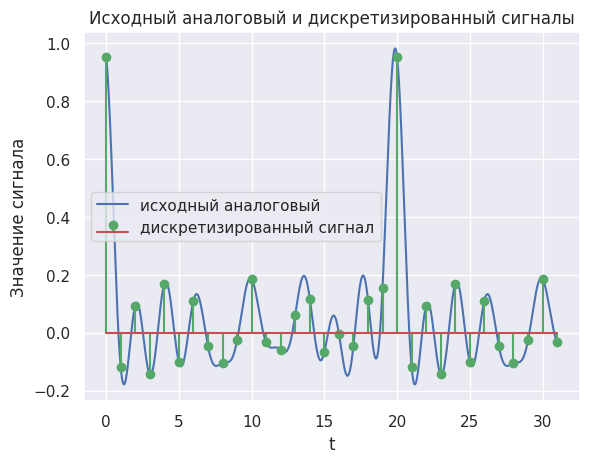

In [ ]:
plt.plot(t_a, [s(t) for t in t_a], label="исходный аналоговый")
d_sig = [s(t) for t in t_d]
plt.stem(t_d, d_sig, 'g', markerfmt='go', label="дискретизированный сигнал")
plt.title("Исходный аналоговый и дискретизированный сигналы")
plt.xlabel("t")
plt.ylabel("Значение сигнала")
plt.legend();

### 3) ДПФ
---
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

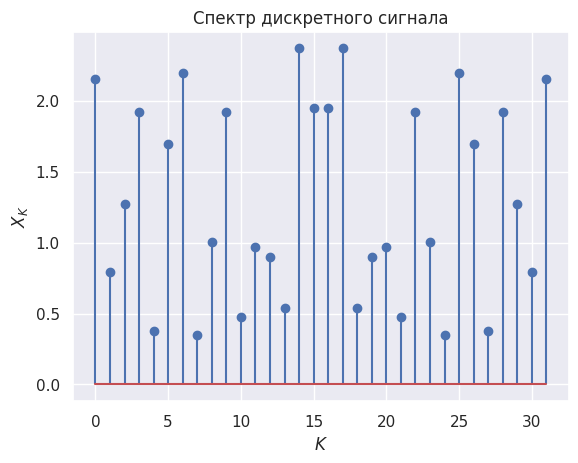

In [ ]:
def DFT(sig, n):
  return sum(exp(-1j*2*pi*n*i/N)*sig[i] for i in range(N + 1))

spectrum = []
for i in range(N+1):
  spectrum.append(np.abs(DFT(d_sig, i)))

plt.title('Спектр дискретного сигнала')
plt.stem(t_d, np.abs(spectrum))
plt.xlabel(r'$K$')
plt.ylabel(r"$X_K$");

Спектр сигнала симметричен: гармоники с номерами $K$ и $N - K$ совпадают.

### 4)


---

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

In [ ]:
def lin_smooth(sig, n, samples_num):
  return sum(sig[n + i] if (n+i >= 0 and n+i <= N) else 0 for i in range(-(samples_num//2), samples_num//2 + 1) )/samples_num

def H_lin_smooth(w, samples_num):
  return (1 + sum(2*cos(i*w) for i in range(1, samples_num//2 + 1)))/samples_num

smoothed_sig_5 = [lin_smooth(d_sig, i, 5) for i in range(N+1)]
smoothed_sig_9 = [lin_smooth(d_sig, i, 9) for i in range(N+1)]

### 5) Визуализация отфильтрованного сигнала
---
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.


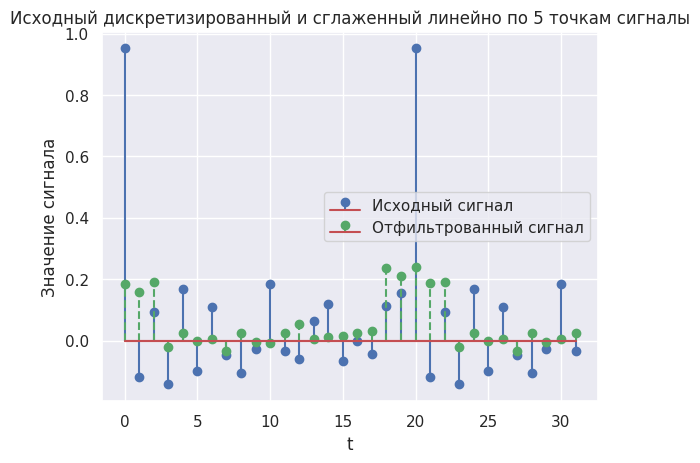

In [ ]:
plt.stem(t_d, d_sig, label="Исходный сигнал")
plt.stem(t_d, smoothed_sig_5, 'g', markerfmt='go', linefmt="go--", label="Отфильтрованный сигнал")
plt.title("Исходный дискретизированный и сглаженный линейно по 5 точкам сигналы")
plt.xlabel("t")
plt.ylabel("Значение сигнала")
plt.legend();


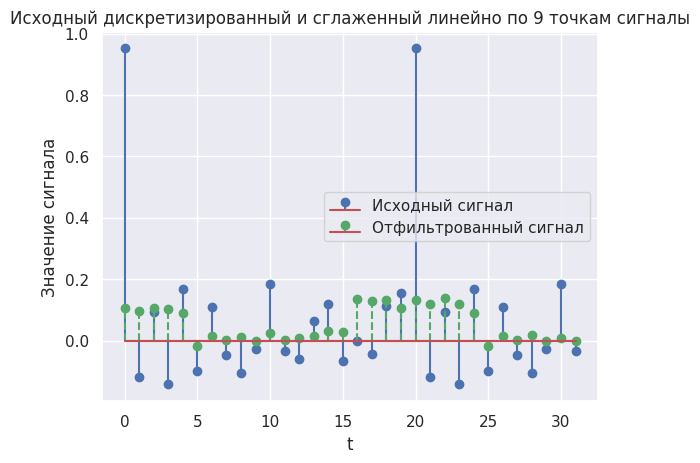

In [ ]:
plt.stem(t_d, d_sig, label="Исходный сигнал")
plt.stem(t_d, smoothed_sig_9, 'g', markerfmt='go', linefmt="go--", label="Отфильтрованный сигнал")
plt.title("Исходный дискретизированный и сглаженный линейно по 9 точкам сигналы")
plt.xlabel("t")
plt.ylabel("Значение сигнала")
plt.legend();


В результате сглаживания исчезли отдельные крупные сигналы. Теперь наблюдаются группы сигналов, близкие к 0. В группах, в которые попали исходные сигналы со значением, близким к 1, сигналы расположены достаточно близко друг к другу и выше 0. В других группах среднее значение близко к 0.

### 6) Дискретные отсчеты спектра сигнала после фильтрации
---
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.


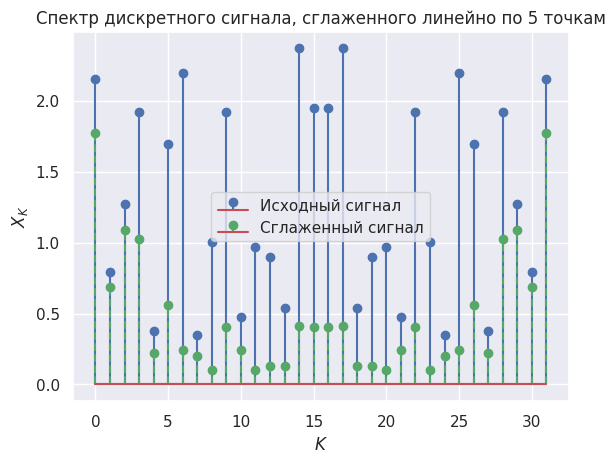

In [ ]:
spectrum = []
for i in range(N+1):
  spectrum.append(np.abs(DFT(d_sig, i)))

filtered_spectrum = []
for i in range(N+1):
  filtered_spectrum.append(np.abs(DFT(smoothed_sig_5, i)))

plt.title('Спектр дискретного сигнала, сглаженного линейно по 5 точкам')
plt.stem(t_d, np.abs(spectrum), label="Исходный сигнал")
plt.stem(t_d, np.abs(filtered_spectrum), 'g', markerfmt='go', linefmt="go--", label="Сглаженный сигнал")
plt.legend()
plt.xlabel(r'$K$')
plt.ylabel(r"$X_K$");


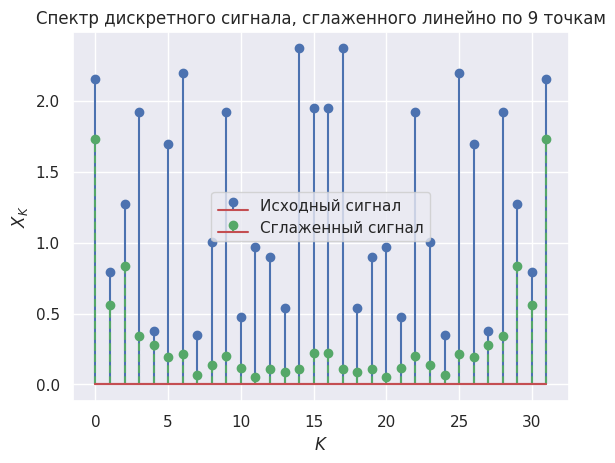

In [ ]:
spectrum = []
for i in range(N+1):
  spectrum.append(np.abs(DFT(d_sig, i)))

filtered_spectrum = []
for i in range(N+1):
  filtered_spectrum.append(np.abs(DFT(smoothed_sig_9, i)))

plt.title('Спектр дискретного сигнала, сглаженного линейно по 9 точкам')
plt.stem(t_d, np.abs(spectrum), label="Исходный сигнал")
plt.stem(t_d, np.abs(filtered_spectrum), 'g', markerfmt='go', linefmt="go--", label="Сглаженный сигнал")
plt.legend()
plt.xlabel(r'$K$')
plt.ylabel(r"$X_K$");


В результате линейного сглаживания гармоники спектров уменьшились. При этом крайние гармоники уменьшились не так значительно, как средние гармоники.

### 7)
---
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

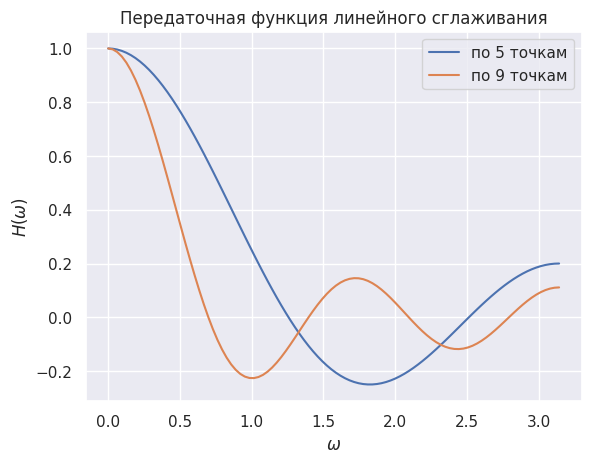

In [ ]:
w_range = np.linspace(0, pi, 100)
plt.plot(w_range, [H_lin_smooth(w_i, 5) for w_i in w_range], label="по 5 точкам")
plt.plot(w_range, [H_lin_smooth(w_i, 9) for w_i in w_range], label="по 9 точкам")

plt.title("Передаточная функция линейного сглаживания")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$H(\omega)$")
plt.legend();


Сглаживание по 9 точкам пропускает меньшую часть спектра, при этом боковые лепестки также меньше.

### 8)
---
Повторить п. 4–7 для следующих фильтров:  
* a) Сглаживание полиномом 2-ой степени по 5 и 9 узлам.  
* b) Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

8.a.1) Сглаживание полиномом 2-ой степени по 5-ти точкам.

In [ ]:
def smooth2_5(sig, n):
  return (-3*(sig[n - 2] + sig[n + 2]) + 12*(sig[n - 1] + sig[n + 1]) + 17*sig[n])/35

def H_2_5(w):
  return (17 + 24*cos(w) - 6*cos(2*w))/35

def smooth2_9(sig, n):
  return (-21*(sig[n - 4] + sig[n + 4]) + 14*(sig[n - 3] + sig[n + 3]) +
           39*(sig[n - 2] + sig[n + 2]) + 54*(sig[n - 1] + sig[n + 1]) + 59*sig[n])/231

def H_2_9(w):
  return (59 + 108*cos(w) + 78*cos(2*w) + 28*cos(3*w) - 42*cos(4*w))/231

smoothed2_sig_5 =  [smooth2_5([*d_sig, 0, 0], i) for i in range(N+1)]
smoothed2_sig_9 =  [smooth2_9([*d_sig, 0, 0, 0, 0], i) for i in range(N+1)]

8.а.2) Визуализация отфильтрованного сигнала

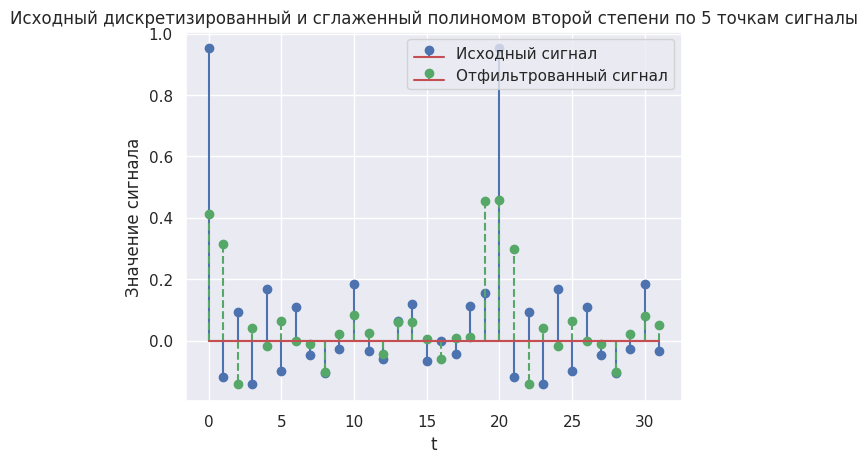

In [ ]:
plt.stem(t_d, d_sig, label="Исходный сигнал")
plt.stem(t_d, smoothed2_sig_5, 'g', markerfmt='go', linefmt="go--", label="Отфильтрованный сигнал")
plt.title("Исходный дискретизированный и сглаженный полиномом второй степени по 5 точкам сигналы")
plt.xlabel("t")
plt.ylabel("Значение сигнала")
plt.legend();


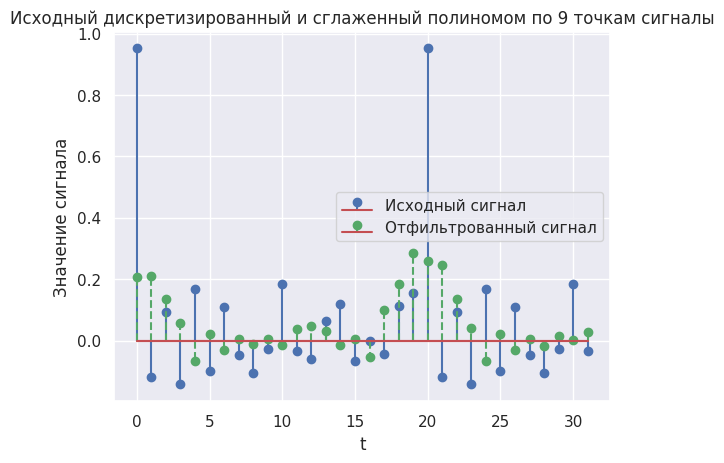

In [ ]:
plt.stem(t_d, d_sig, label="Исходный сигнал")
plt.stem(t_d, smoothed2_sig_9, 'g', markerfmt='go', linefmt="go--", label="Отфильтрованный сигнал")
plt.title("Исходный дискретизированный и сглаженный полиномом по 9 точкам сигналы")
plt.xlabel("t")
plt.ylabel("Значение сигнала")
plt.legend();


Сглаживание полиномом 2 степени приводит к тому, что исчезают отдельные сигналы с большим значением. При этом визуальной группировки сигналов не наблюдается.

8.a.3) Дискретные отсчеты спектра сигнала после фильтрации

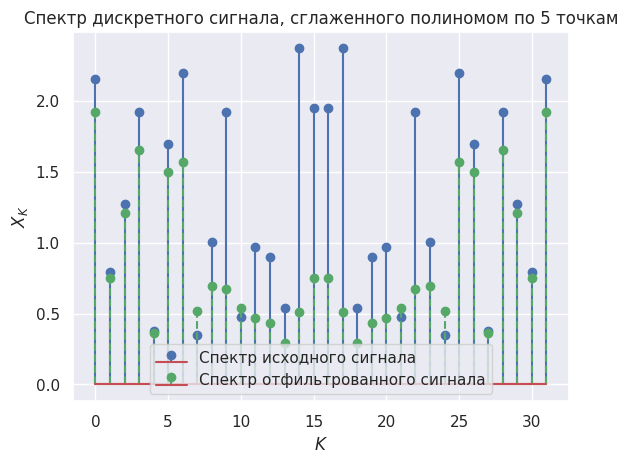

In [ ]:
spectrum = []
for i in range(N+1):
  spectrum.append(np.abs(DFT(d_sig, i)))

filtered_spectrum = []
for i in range(N+1):
  filtered_spectrum.append(np.abs(DFT(smoothed2_sig_5, i)))

plt.title('Спектр дискретного сигнала, сглаженного полиномом по 5 точкам')
plt.stem(t_d, np.abs(spectrum), label="Спектр исходного сигнала")
plt.stem(t_d, np.abs(filtered_spectrum), 'g', markerfmt='go', linefmt="go--", label="Спектр отфильтрованного сигнала")
plt.legend()
plt.xlabel(r'$K$')
plt.ylabel(r"$X_K$");


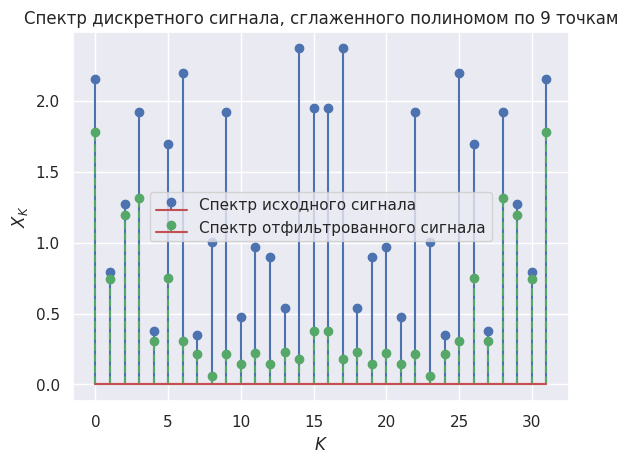

In [ ]:
spectrum = []
for i in range(N+1):
  spectrum.append(np.abs(DFT(d_sig, i)))

filtered_spectrum = []
for i in range(N+1):
  filtered_spectrum.append(np.abs(DFT(smoothed2_sig_9, i)))

plt.title('Спектр дискретного сигнала, сглаженного полиномом по 9 точкам')
plt.stem(t_d, np.abs(spectrum), label="Спектр исходного сигнала")
plt.stem(t_d, np.abs(filtered_spectrum), 'g', markerfmt='go', linefmt="go--", label="Спектр отфильтрованного сигнала")
plt.legend()
plt.xlabel(r'$K$')
plt.ylabel(r"$X_K$");


Как и в случае с линейным сглаживанием, сглаживание полиномом второй степени приводит к уменьшению значений гармоник спектра, но большее число крайних гармоник сохраняет значение, близкое к изначальному.

8.a.4) Вывод

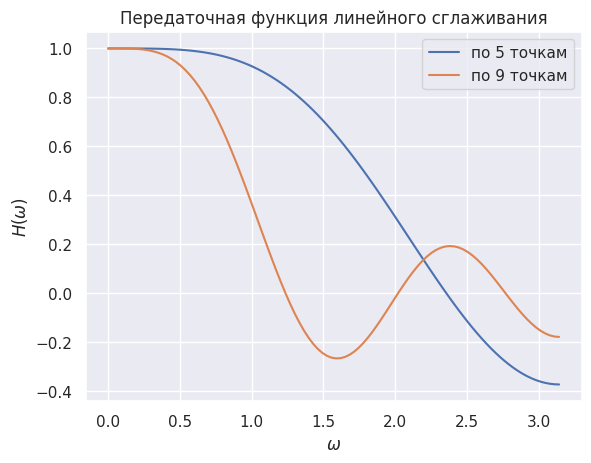

In [ ]:
w_range = np.linspace(0, pi, 100)
plt.plot(w_range, [H_2_5(w_i) for w_i in w_range], label="по 5 точкам")
plt.plot(w_range, [H_2_9(w_i) for w_i in w_range], label="по 9 точкам")

plt.title("Передаточная функция линейного сглаживания")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$H(\omega)$")
plt.legend();


Сглаживание полиномом 2 степени отличается тем, что пропускает более широкую полосу частот. Из-за этого большее число гармоник спектра имеют значение, далекое от 0.

8.b.1) Сглаживание полиномом 4 степени по 7 и 11 узлам

In [ ]:
def smooth4_7(sig, n):
  return (5*(sig[n - 3] + sig[n + 3]) - 30*(sig[n - 2] + sig[n + 2]) +
          75*(sig[n - 1] + sig[n + 1]) + 131*sig[n])/231

def H_4_7(w):
  return (131 + 150*cos(w) - 60*cos(2*w) + 10*cos(3*w))/231

def smooth4_11(sig, n):
  return (18*(sig[n - 5] + sig[n + 5]) - 45*(sig[n - 4] + sig[n + 4]) - 10*(sig[n - 3] + sig[n + 3]) +
           60*(sig[n - 2] + sig[n + 2]) + 120*(sig[n - 1] + sig[n + 1]) + 143*sig[n])/429

def H_4_11(w):
  return (143 + 240*cos(w) + 120*cos(2*w) - 20*cos(3*w) - 90*cos(4*w) + 36*cos(5*w))/429

smoothed4_sig_7 =  [smooth4_7([*d_sig, 0, 0, 0, 0], i) for i in range(N+1)]
smoothed4_sig_11 =  [smooth4_11([*d_sig, 0, 0, 0, 0, 0, 0], i) for i in range(N+1)]

8.b.2) Визуализация отфильтрованного сигнала

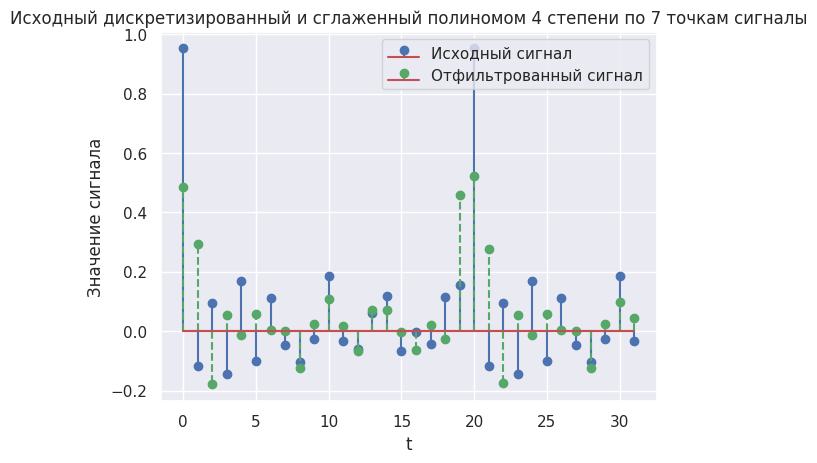

In [ ]:
plt.stem(t_d, d_sig, label="Исходный сигнал")
plt.stem(t_d, smoothed4_sig_7, 'g', markerfmt='go', linefmt="go--", label="Отфильтрованный сигнал")
plt.title("Исходный дискретизированный и сглаженный полиномом 4 степени по 7 точкам сигналы")
plt.xlabel("t")
plt.ylabel("Значение сигнала")
plt.legend();

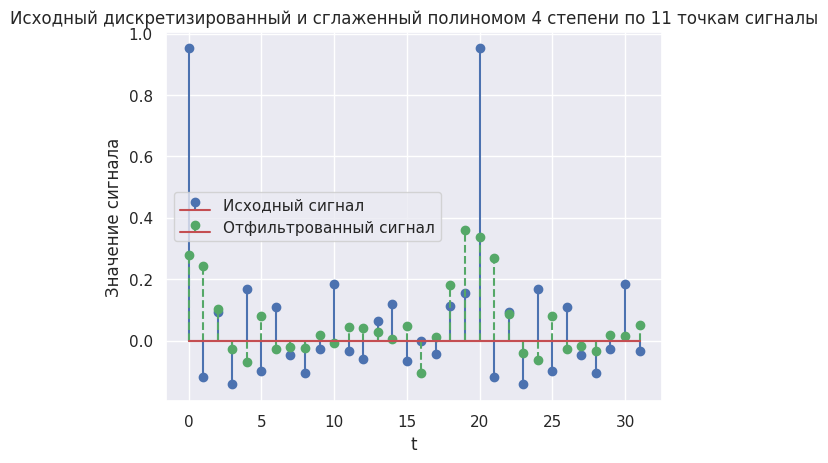

In [ ]:
plt.stem(t_d, d_sig, label="Исходный сигнал")
plt.stem(t_d, smoothed4_sig_11, 'g', markerfmt='go', linefmt="go--", label="Отфильтрованный сигнал")
plt.title("Исходный дискретизированный и сглаженный полиномом 4 степени по 11 точкам сигналы")
plt.xlabel("t")
plt.ylabel("Значение сигнала")
plt.legend();

8.b.3) Дискретные отсчеты спектра

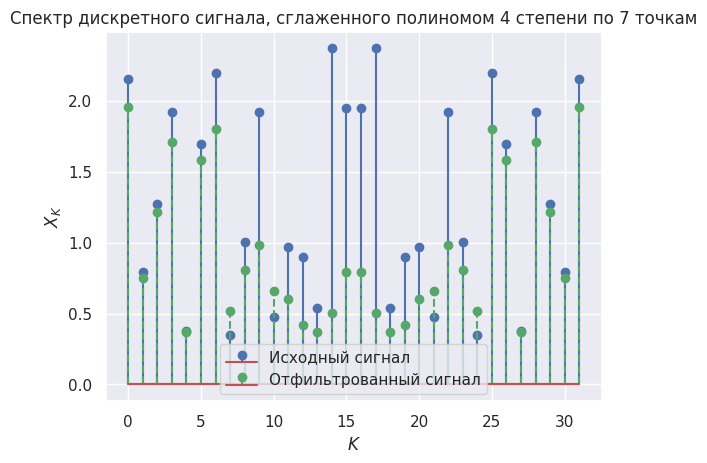

In [ ]:
spectrum = []
for i in range(N+1):
  spectrum.append(np.abs(DFT(d_sig, i)))

filtered_spectrum = []
for i in range(N+1):
  filtered_spectrum.append(np.abs(DFT(smoothed4_sig_7, i)))

plt.title('Спектр дискретного сигнала, сглаженного полиномом 4 степени по 7 точкам')
plt.stem(t_d, np.abs(spectrum), label="Исходный сигнал")
plt.stem(t_d, np.abs(filtered_spectrum), 'g', markerfmt='go', linefmt="go--", label="Отфильтрованный сигнал")
plt.legend()
plt.xlabel(r'$K$')
plt.ylabel(r"$X_K$");


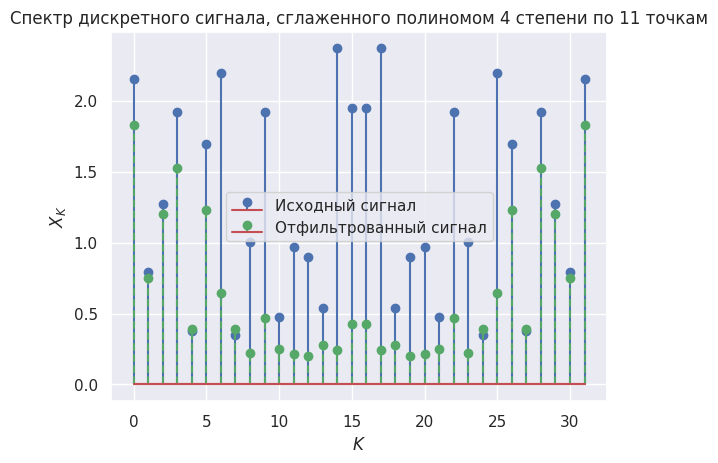

In [ ]:
spectrum = []
for i in range(N+1):
  spectrum.append(np.abs(DFT(d_sig, i)))

filtered_spectrum = []
for i in range(N+1):
  filtered_spectrum.append(np.abs(DFT(smoothed4_sig_11, i)))

plt.title('Спектр дискретного сигнала, сглаженного полиномом 4 степени по 11 точкам')
plt.stem(t_d, np.abs(spectrum), label="Исходный сигнал")
plt.stem(t_d, np.abs(filtered_spectrum), 'g', markerfmt='go', linefmt="go--", label="Отфильтрованный сигнал")
plt.legend()
plt.xlabel(r'$K$')
plt.ylabel(r"$X_K$");


Здесь закономерность продолжает соблюдаться: увеличение степени полинома приводит к расширению полосы пропускания и росту значений гармоник, близких к краям спектра.

8.b.4) Передаточная функция

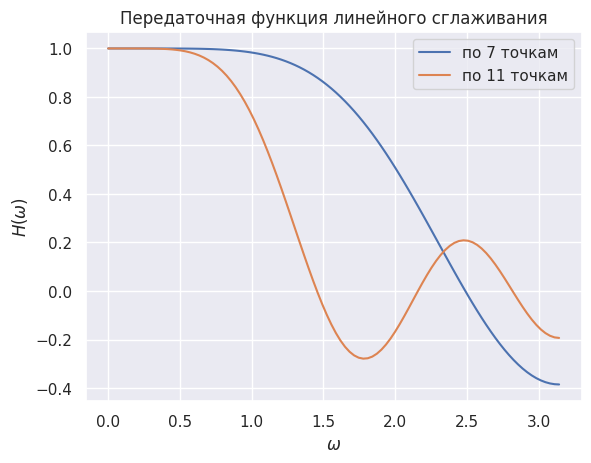

In [ ]:
w_range = np.linspace(0, pi, 100)
plt.plot(w_range, [H_4_7(w_i) for w_i in w_range], label="по 7 точкам")
plt.plot(w_range, [H_4_11(w_i) for w_i in w_range], label="по 11 точкам")

plt.title("Передаточная функция линейного сглаживания")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$H(\omega)$")
plt.legend();


Более широкой полосе пропускания соответствует большее количество гармоник с значениями, далекими от 0.

## Выводы

В ходе выполнения практической работы была произведена фильтрация дискретных последовательностей с помощью линейного и полиномиальных фильтров. С помощью ДПФ был произведен анализ полученных результатов. Была рассмотрена фильтрация сигнала с использованием линейного сглаживания по 5 и 9 точкам, а также сглаживание полиномом 2 степени по 5 и 9 узлам и сглаживание полиномом 4 степени по 7 и 11 узлам. Были рассмотрены свойства полученных фильтров и передаточных функций.

Отмечено важное свойство: подавление фильтром средних частот соответствует подавлению средних гармоник спектра. Расширение полосы пропускания сигнала соответствует увеличению числа гармоник, значительно отличающихся от 0.